In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def MMR_super_period(p_transit, p_other, j, k):
    '''
    from eq 9, here https://arxiv.org/pdf/1706.09849.pdf
    '''
    
    p_ttv = 1 / np.abs((j / p_other) - (k / p_transit))

    
    
    return p_ttv

In [23]:
MMR_super_period(160.9, 320, 2, 1)

28604.44444444364

In [24]:
p_other = np.arange(60, 900, .1)

In [131]:
p_koi3678 = 160.8845
mmr_periods = []
ratios = []
ratio_labels = []

for jj in range(1,6):
    for kk in range(1,6):
        if (jj/kk) not in ratios and (jj/kk) != 1:
            p_other = np.arange(((jj/kk)*p_koi3678)/1.05, ((jj/kk)*p_koi3678)*1.05, .1)
            ratios.append(jj/kk)
            ratio_labels.append(str(jj) + ':' +  str(kk))
            mmr_periods.append([p_other, MMR_super_period(p_koi3678, p_other, jj, kk)])

In [132]:
ratios

[0.5,
 0.3333333333333333,
 0.25,
 0.2,
 2.0,
 0.6666666666666666,
 0.4,
 3.0,
 1.5,
 0.75,
 0.6,
 4.0,
 1.3333333333333333,
 0.8,
 5.0,
 2.5,
 1.6666666666666667,
 1.25]

In [126]:
period_ratios = []
for vals in ratios:

    if int(ratio) != ratio:
        print(vals)
        
        


[1, 2]
[1, 3]
[1, 4]
[1, 5]
[2, 3]
[2, 4]
[2, 5]
[3, 2]
[3, 4]
[3, 5]
[4, 3]
[4, 5]
[5, 2]
[5, 3]
[5, 4]


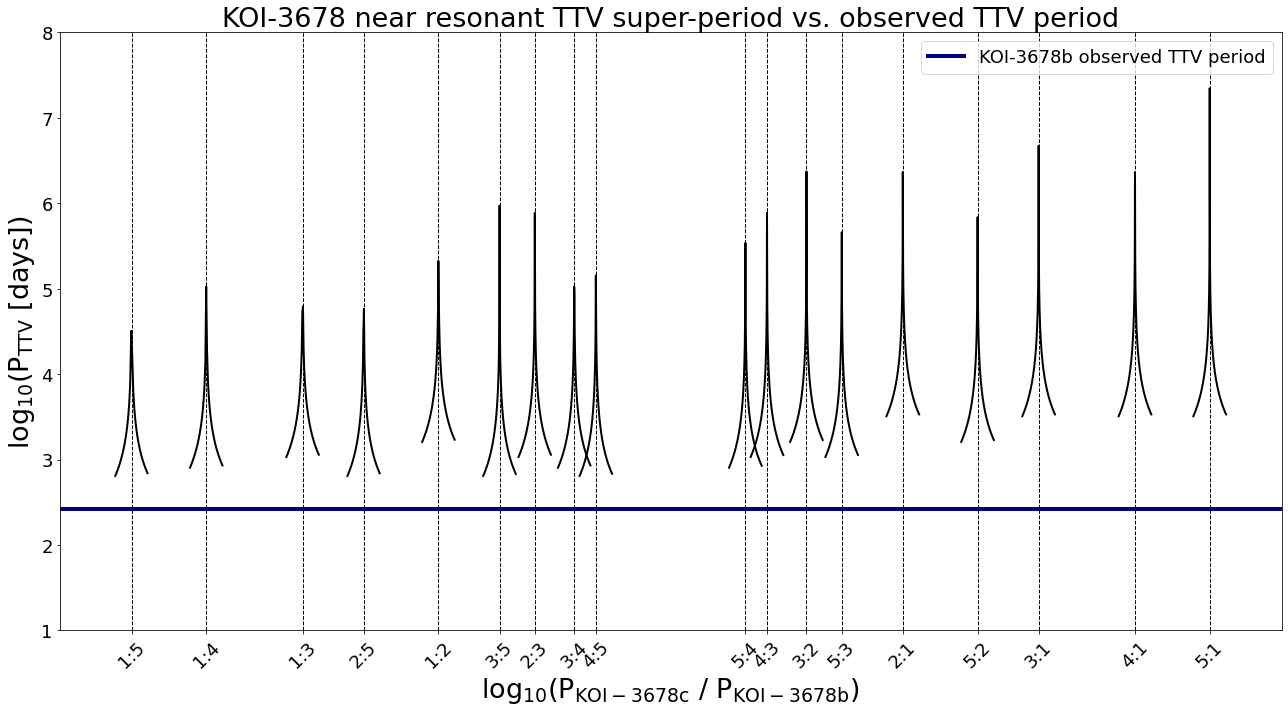

In [176]:
plt.figure(figsize=[18,10])
for ii in range(0, len(mmr_periods)):
    p_other, super_period = mmr_periods[ii]
    ratio = ratios[ii]
    
    
    plt.plot(np.log10(p_other/p_koi3678), np.log10(super_period), color='k', lw=2)
    plt.axvline(np.log10(ratio), 0, 10, color='k', ls='dashed', lw=1)
    
plt.ylim(1,8)
plt.xlabel(r"log$_{10}$(P$_\mathrm{KOI-3678c}$ / P$_\mathrm{KOI-3678b}$)", fontsize=27)
plt.ylabel(r"log$_{10}$(P$_\mathrm{TTV}$ [days])", fontsize=27)
plt.title('KOI-3678 near resonant TTV super-period vs. observed TTV period', fontsize=27)
plt.axhline(np.log10(264.2265514820398), 0, 800, color = '#000080', label='KOI-3678b observed TTV period', linewidth=4)
#plt.semilogy()
#plt.semilogx()
plt.legend(fontsize=18)



plt.xticks(ticks=np.log10(np.array(ratios)), labels=ratio_labels, fontsize = 18, rotation = 45)
plt.yticks(fontsize = 18)

plt.tight_layout()
plt.savefig('mmr_super_period.pdf')

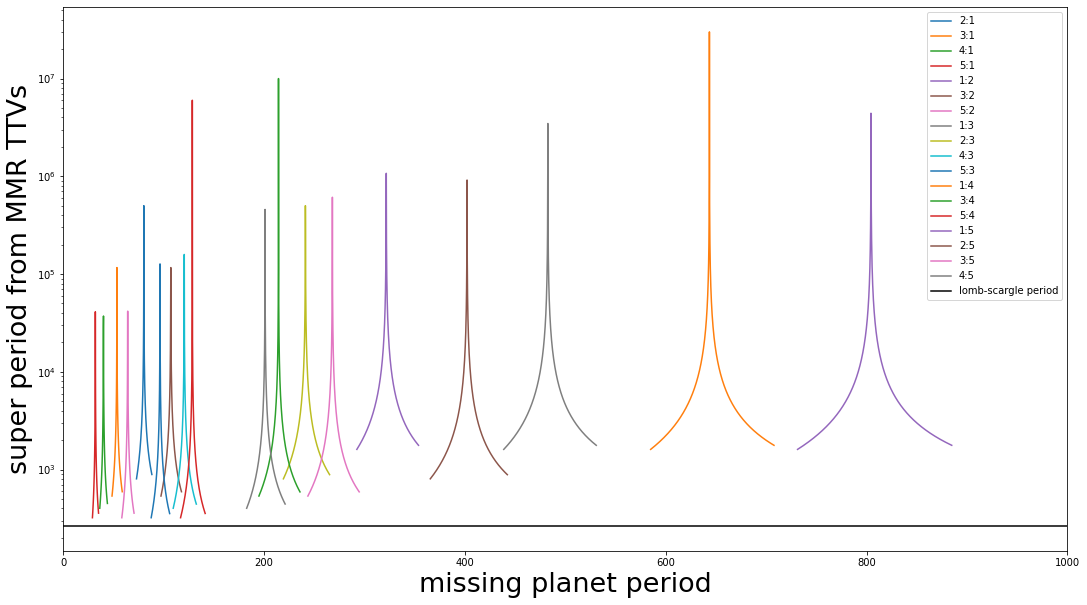

In [82]:
plt.figure(figsize=[18,10])
for label, p_other, super_period in mmr_periods:
    plt.plot(p_other, super_period, label=label)
    
plt.xlim(0,1000)
plt.xlabel("missing planet period", fontsize=27)
plt.ylabel("super period from MMR TTVs", fontsize=27)
plt.axhline(264.2265514820398, 0, 800, color = 'k', label='lomb-scargle period')
plt.semilogy()
plt.legend(loc=1)